In [ ]:
#pip uninstall xgboost 

In [ ]:
#pip install xgboost==0.90

### Import Packages

In [1]:
import pandas as pd

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.preprocessing import MinMaxScaler

In [8]:
import seaborn as sns

### Import DataFrame

In [9]:
WorkingDataFrame = pd.read_pickle('mergedDF.pkl')
WorkingDataFrame

,artistName,title,msPlayed,ESTTime,ESTTimeNumeric,Categories,Number,artist,top genre,year,...,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Meek Mill,Dreams and Nightmares,998,1PM,780,2,178,Meek Mill,hip hop,2012,...,80,77,63,2,28,44,231,47,30,78
1,Meek Mill,Dreams and Nightmares,998,1PM,780,2,1490,Meek Mill,hip hop,2012,...,80,77,63,2,28,44,231,47,30,44
2,Meek Mill,Dreams and Nightmares,812,12PM,720,2,178,Meek Mill,hip hop,2012,...,80,77,63,2,28,44,231,47,30,78
3,Meek Mill,Dreams and Nightmares,812,12PM,720,2,1490,Meek Mill,hip hop,2012,...,80,77,63,2,28,44,231,47,30,44
4,Meek Mill,Dreams and Nightmares,91848,4PM,960,2,178,Meek Mill,hip hop,2012,...,80,77,63,2,28,44,231,47,30,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22036,Offset,How Did I Get Here (feat. J. Cole),10709,1PM,780,2,1044,Offset,atl hip hop,2019,...,130,54,88,8,8,11,277,51,23,55
22037,Offset,Wild Wild West (feat. Gunna),661,1PM,780,2,1194,Offset,atl hip hop,2019,...,114,62,90,5,14,50,236,8,20,52
22038,Offset,Came A Long Way,0,1PM,780,2,1258,Offset,atl hip hop,2019,...,100,77,81,5,9,28,173,49,12,50
22039,Offset,Tats On My Face,2090,1PM,780,2,1398,Offset,atl hip hop,2019,...,140,34,88,9,11,21,182,23,30,47


### Data Prep

In [10]:
le = LabelEncoder()

In [11]:
WorkingDataSet = WorkingDataFrame[['Categories','year','top genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
WorkingDataSet

,Categories,year,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,2,2012,hip hop,80,77,63,2,28,44,231,47,30,78
1,2,2012,hip hop,80,77,63,2,28,44,231,47,30,44
2,2,2012,hip hop,80,77,63,2,28,44,231,47,30,78
3,2,2012,hip hop,80,77,63,2,28,44,231,47,30,44
4,2,2012,hip hop,80,77,63,2,28,44,231,47,30,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22036,2,2019,atl hip hop,130,54,88,8,8,11,277,51,23,55
22037,2,2019,atl hip hop,114,62,90,5,14,50,236,8,20,52
22038,2,2019,atl hip hop,100,77,81,5,9,28,173,49,12,50
22039,2,2019,atl hip hop,140,34,88,9,11,21,182,23,30,47


In [12]:
top_genre_uniques = WorkingDataSet['top genre'].unique()
top_genre_uniques

array(['hip hop', 'atl hip hop', 'chicago rap', 'boston hip hop',
       'memphis hip hop', 'melodic rap', 'chicago drill', 'electro house',
       'cali rap', 'canadian hip hop', 'r&b', 'dance pop',
       'kentucky hip hop', 'contemporary r&b', 'east coast hip hop',
       'nyc rap', 'brooklyn drill', 'deep underground hip hop', 'pop',
       'pop rap', 'barbadian pop', 'pluggnb', 'dirty south rap',
       'conscious hip hop', 'detroit hip hop', 'florida rap', 'dfw rap',
       'florida drill', 'detroit trap', 'pop r&b', 'hip pop',
       'canadian pop', 'chicago bop', 'new jersey rap', 'atl trap', 'edm',
       'dutch house', 'big room', 'afrobeats', 'comedy rap',
       'north carolina hip hop', 'indie pop rap', 'gangster rap',
       'brostep', 'alternative r&b', 'dancehall', 'grime',
       'arkansas hip hop', 'ohio hip hop', 'reggaeton', 'houston rap',
       'baton rouge rap', 'piano rock', 'lgbtq+ hip hop',
       'upstate ny rap', 'australian hip hop', 'alabama rap', 'emo rap

In [13]:
encoded_top_genre = le.fit_transform(top_genre_uniques)

In [14]:
label_map = {label: encoded_top_genre for label, encoded_top_genre in zip(top_genre_uniques, encoded_top_genre)}
label_map

{'hip hop': 43,
 'atl hip hop': 4,
 'chicago rap': 20,
 'boston hip hop': 11,
 'memphis hip hop': 50,
 'melodic rap': 49,
 'chicago drill': 19,
 'electro house': 35,
 'cali rap': 14,
 'canadian hip hop': 16,
 'r&b': 63,
 'dance pop': 25,
 'kentucky hip hop': 47,
 'contemporary r&b': 24,
 'east coast hip hop': 33,
 'nyc rap': 54,
 'brooklyn drill': 12,
 'deep underground hip hop': 27,
 'pop': 59,
 'pop rap': 61,
 'barbadian pop': 7,
 'pluggnb': 58,
 'dirty south rap': 31,
 'conscious hip hop': 23,
 'detroit hip hop': 28,
 'florida rap': 38,
 'dfw rap': 30,
 'florida drill': 37,
 'detroit trap': 29,
 'pop r&b': 60,
 'hip pop': 44,
 'canadian pop': 17,
 'chicago bop': 18,
 'new jersey rap': 52,
 'atl trap': 5,
 'edm': 34,
 'dutch house': 32,
 'big room': 9,
 'afrobeats': 0,
 'comedy rap': 22,
 'north carolina hip hop': 53,
 'indie pop rap': 46,
 'gangster rap': 41,
 'brostep': 13,
 'alternative r&b': 2,
 'dancehall': 26,
 'grime': 42,
 'arkansas hip hop': 3,
 'ohio hip hop': 56,
 'reggaet

In [15]:
WorkingDataSet['top genre'] = le.fit_transform(WorkingDataSet['top genre'])
WorkingDataSet

C:\Users\MoJo\AppData\Local\Temp\ipykernel_5472\2795416579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WorkingDataSet['top genre'] = le.fit_transform(WorkingDataSet['top genre'])


,Categories,year,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,2,2012,43,80,77,63,2,28,44,231,47,30,78
1,2,2012,43,80,77,63,2,28,44,231,47,30,44
2,2,2012,43,80,77,63,2,28,44,231,47,30,78
3,2,2012,43,80,77,63,2,28,44,231,47,30,44
4,2,2012,43,80,77,63,2,28,44,231,47,30,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22036,2,2019,4,130,54,88,8,8,11,277,51,23,55
22037,2,2019,4,114,62,90,5,14,50,236,8,20,52
22038,2,2019,4,100,77,81,5,9,28,173,49,12,50
22039,2,2019,4,140,34,88,9,11,21,182,23,30,47


In [16]:
len(WorkingDataSet['top genre'].unique())

67

In [17]:
WorkingDataSet

,Categories,year,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,2,2012,43,80,77,63,2,28,44,231,47,30,78
1,2,2012,43,80,77,63,2,28,44,231,47,30,44
2,2,2012,43,80,77,63,2,28,44,231,47,30,78
3,2,2012,43,80,77,63,2,28,44,231,47,30,44
4,2,2012,43,80,77,63,2,28,44,231,47,30,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22036,2,2019,4,130,54,88,8,8,11,277,51,23,55
22037,2,2019,4,114,62,90,5,14,50,236,8,20,52
22038,2,2019,4,100,77,81,5,9,28,173,49,12,50
22039,2,2019,4,140,34,88,9,11,21,182,23,30,47


In [18]:
corr_matrix = WorkingDataSet.corr()

In [19]:
corr_matrix

,Categories,year,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Categories,1.000000,0.014481,0.067036,-0.014155,-0.005996,-0.054610,0.004592,-0.038422,-0.001558,0.032240,-0.002306,-0.049362,-0.077900
year,0.014481,1.000000,0.022898,0.066935,-0.254040,0.191809,0.173350,-0.111967,-0.162062,-0.469320,-0.012075,0.026121,-0.175822
top genre,0.067036,0.022898,1.000000,-0.136311,0.092857,-0.330310,-0.051003,-0.038718,-0.000282,0.086351,-0.035501,-0.170938,-0.193005
bpm,-0.014155,0.066935,-0.136311,1.000000,-0.067630,0.038655,0.128713,-0.076580,-0.011875,-0.039279,-0.025335,0.205515,0.000261
nrgy,-0.005996,-0.254040,0.092857,-0.067630,1.000000,-0.250939,-0.629367,0.220292,0.358148,0.176795,-0.110847,-0.072994,-0.043457
dnce,-0.054610,0.191809,-0.330310,0.038655,-0.250939,1.000000,0.098464,-0.015000,0.150249,-0.300017,-0.090392,0.168806,0.231268
dB,0.004592,0.173350,-0.051003,0.128713,-0.629367,0.098464,1.000000,-0.160409,-0.176676,-0.113469,0.004902,0.148732,0.028688
live,-0.038422,-0.111967,-0.038718,-0.076580,0.220292,-0.015000,-0.160409,1.000000,0.050541,0.028241,0.021184,0.103365,0.061509
val,-0.001558,-0.162062,-0.000282,-0.011875,0.358148,0.150249,-0.176676,0.050541,1.000000,-0.026779,0.060711,0.048591,-0.013359
dur,0.032240,-0.469320,0.086351,-0.039279,0.176795,-0.300017,-0.113469,0.028241,-0.026779,1.000000,-0.029634,-0.113614,-0.019276


<Axes: >

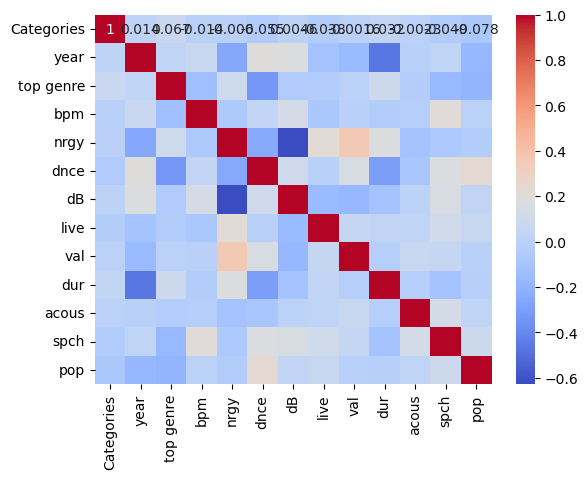

In [20]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [20]:
# Assuming your DataFrame is called df and you want to split based on a target column 'target_column'
X = WorkingDataSet.drop('top genre', axis=1)
y = WorkingDataSet['top genre']

# Split the data into training (70%) and temporary data (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary data into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
X_train

,Categories,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
8654,0,2017,82,78,56,5,8,24,256,9,5,70
17702,2,2021,140,73,78,4,9,44,182,3,8,69
19799,3,2021,84,74,84,5,63,17,204,2,11,74
20118,3,2009,176,74,41,6,11,42,236,4,6,52
14720,1,2015,100,58,81,7,35,44,222,4,7,63
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2,2015,89,74,64,5,29,53,225,1,4,62
21575,0,2023,131,66,84,6,10,66,160,17,6,63
5390,2,2021,136,45,58,6,12,10,193,6,29,83
860,1,2021,152,63,68,6,14,18,161,0,4,64


In [22]:
X_val

,Categories,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
4954,3,2015,206,27,58,6,13,35,188,88,5,83
2656,1,2016,96,59,56,5,34,7,182,5,4,75
14485,2,2015,160,43,53,11,14,28,195,11,19,82
3458,1,2007,87,75,67,7,12,92,203,34,19,86
12240,2,2012,82,72,52,6,11,38,239,1,4,44
...,...,...,...,...,...,...,...,...,...,...,...,...
18393,2,2015,99,53,88,6,10,26,206,2,4,52
12440,3,2015,96,56,71,7,9,41,208,3,5,74
17525,2,2019,160,52,71,6,21,56,202,23,9,70
10144,1,2022,96,59,59,8,12,39,194,1,4,43


In [23]:
X_test

,Categories,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
9875,1,2014,105,91,65,5,7,34,225,1,12,47
17713,0,2021,100,56,87,10,10,69,156,1,19,72
21105,1,2012,88,61,50,9,13,41,315,45,9,42
1253,1,2017,140,73,76,6,6,38,169,0,11,65
6064,3,2011,80,71,62,7,17,68,196,5,5,69
...,...,...,...,...,...,...,...,...,...,...,...,...
20255,2,2021,180,77,72,7,8,14,181,0,7,41
15980,3,2014,193,41,68,10,9,16,234,3,43,72
7149,1,2015,185,56,69,6,7,12,213,19,14,77
16878,2,2022,140,60,86,7,5,48,192,2,33,68


In [24]:
y_train

8654     63
17702    43
19799    16
20118    63
14720    25
         ..
11964    25
21575    14
5390     16
860      43
15795    44
Name: top genre, Length: 15428, dtype: int32

In [25]:
y_val

4954      7
2656     20
14485    47
3458     20
12240    63
         ..
18393    61
12440    25
17525    20
10144    63
12680    63
Name: top genre, Length: 3306, dtype: int32

In [26]:
y_test

9875     63
17713    29
21105    63
1253      4
6064     25
         ..
20255    16
15980    14
7149     49
16878    50
7845     44
Name: top genre, Length: 3307, dtype: int32

### Logistic Regression Model

In [27]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are your training, validation, and test sets
# Convert the data to numpy arrays
X_train_log = np.array(X_train)
X_val_log = np.array(X_val)
X_test_log = np.array(X_test)
y_train_log = np.array(y_train)
y_val_log = np.array(y_val)
y_test_log = np.array(y_test)

In [29]:
model = LogisticRegression(max_iter=1000) # I always liek to start with 1000 iterations

In [30]:
model.fit(X_train_log,y_train_log)

C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [31]:
predictions = model.predict(X_test)

C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [32]:
predictions

array([28,  4, 63, ...,  4,  4, 33])

In [33]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.38312670093740553


C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.40
Accuracy of logistic regression classifier on test set: 0.38


C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
X_test_log[:1,:]

array([[   1, 2014,  105,   91,   65,    5,    7,   34,  225,    1,   12,
          47]], dtype=int64)

In [36]:
WholeTestPrediction = model.predict_proba(X_test_log)

In [37]:
TestPrediction = model.predict_proba(X_test_log[:1,:])

In [38]:
ix = TestPrediction.argmax(1).item()

In [39]:
print(ix) #Detriot HipHop

28


In [40]:
print(WholeTestPrediction[0,ix]) #Percentage

0.3351565422467109


### Tuning Parameters

In [42]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='none',max_iter=500), #Cut down to 500 for timesake
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=500),
    LogisticRegression(solver='sag',penalty='none',max_iter=500),
    LogisticRegression(solver='saga',penalty='none',max_iter=500)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

In [43]:
row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_log, y_train_log).predict(X_test_log)
    #micro_roc_auc_ovr = roc_auc_score(y_test, predicted,multi_class = "ovr",average="micro")
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_log, y_train_log), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_log, y_test_log), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test_log, predicted,average='micro'),5) #micro
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_log, predicted,average='micro'),5) #micro
    #clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means th

,Train Accuracy,Test Accuracy,Precission,Recall
0,0.46124,0.44602,0.44602,0.44602
2,0.42358,0.40429,0.40429,0.40429
3,0.40303,0.38555,0.38555,0.38555
1,0.39493,0.38192,0.38192,0.38192


In [44]:
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall
0,0.46124,0.44602,0.44602,0.44602
2,0.42358,0.40429,0.40429,0.40429
3,0.40303,0.38555,0.38555,0.38555
1,0.39493,0.38192,0.38192,0.38192


### Adding L2 Penalty - Combats Overfitting

In [45]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

In [46]:
row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_log, y_train_log).predict(X_test_log)
    #fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_log, y_train_log), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_log, y_test_log), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test_log, predicted,average='micro'),5) #micro
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_log, predicted,average='micro'),5) #micro
    #clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means th

,Train Accuracy,Test Accuracy,Precission,Recall
0,0.46124,0.44602,0.44602,0.44602
2,0.43402,0.41488,0.41488,0.41488
3,0.42365,0.40429,0.40429,0.40429
1,0.40213,0.38313,0.38313,0.38313


### Adding C element - trust Factor (equivalent to area under the ROC)

In [30]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2', C=0.001, max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',C=0.001, max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

In [33]:
row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_log, y_train_log).predict(X_test_log)
    #fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_log, y_train_log), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_log, y_test_log), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test_log, predicted,average='micro'),5) #micro
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_log, predicted,average='micro'),5) #micro
    #clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

KeyboardInterrupt: 

### XGBoost

In [29]:
import xgboost as xgb

In [30]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax')

#### Train Data

In [31]:
y_trainXGBoost = le.fit_transform(y_train)

In [32]:
y_trainXGBoost

array([62, 43, 16, ..., 16, 43, 44], dtype=int64)

In [33]:
X_trainXGBoost = X_train

#### Test Data

In [34]:
X_testXGBoost = X_test

In [35]:
y_testXGBoost = le.fit_transform(y_test)

In [36]:
y_testXGBoost

array([52, 23, 52, ..., 40, 41, 35], dtype=int64)

In [37]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [38]:
# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9449652252797097


### Grid Search Optimization

In [49]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [50]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}


In [51]:
# Create the XGBoost model object
xgb_model = xgb.XGBClassifier(objective='multi:softprob')

In [58]:
# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=2, scoring='accuracy')

In [53]:
#y_train2 = le.fit_transform(y_train)

In [54]:
#class_to_remove = 65
#mask = y_train != class_to_remove
#X_train_filtered = X_train[mask]
#y_train_filtered = y_train[mask]

In [55]:
#X_train

In [56]:
#y_train = le.fit_transform(y_train)

In [59]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=XGBClassifier(objective='multi:softprob'),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='accuracy')

In [60]:
# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1}
Best score:  0.9799714804252009


### Random Search Optimization

In [28]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [29]:

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

In [30]:
# Create the XGBoost model object
xgb_model = xgb.XGBClassifier(objective='multi:softprob')

In [31]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

In [32]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

C:\Users\MoJo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D8CD49E190>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D8CD22F340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D8CD49F2B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D8CB1617F0>},
                   scoring='accuracy')

In [33]:
# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.10527101169418818, 'max_depth': 6, 'n_estimators': 175, 'subsample': 0.9074086249212261}
Best score:  0.98638815332694
